In [140]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import seaborn as sns, pandas as pd, numpy as np

data = pd.read_csv("dados_classificacao/dados.csv", sep=',')

In [141]:
data.dtypes.value_counts()

object    11
int64      7
dtype: int64

In [142]:
df_uniques = pd.DataFrame([[i, len(data[i].unique())] for i in data.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
df_uniques

,Unique Values
Variable,
SEXO,2
IDADE,96
ETNIA,5
ESTADO_CIVIL,6
GRAU DE ESCOLARIDADE,7
CIDADE,294
DISTÂNCIA ATÉ POA,207
CID_ONCOLOGICO,2
DIA_SEMANA_AGENDAMENTO,6


In [143]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
for cl in data.columns:
    if data[cl].dtypes==np.object0:
        data[cl] = le.fit_transform(data[cl])

data.dtypes.value_counts()
# from sklearn.preprocessing import OneHotEncoder

# categorical_cols = data.select_dtypes(include=['object']).columns

# encoder = OneHotEncoder(sparse=False)
# encoded_data = encoder.fit_transform(data[categorical_cols])

# encoded_df = pd.concat([data.drop(categorical_cols, axis=1),
#                         pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))],
#                        axis=1)
# data = encoded_df

int64    18
dtype: int64

In [144]:
mapeamento = {coluna: f'var_{i+1}' for i, coluna in enumerate(data.columns)}
# Renomear as colunas com o mapeamento
data.rename(columns=mapeamento, inplace=True)

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8382 entries, 0 to 8381
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   var_1   8382 non-null   int64
 1   var_2   8382 non-null   int64
 2   var_3   8382 non-null   int64
 3   var_4   8382 non-null   int64
 4   var_5   8382 non-null   int64
 5   var_6   8382 non-null   int64
 6   var_7   8382 non-null   int64
 7   var_8   8382 non-null   int64
 8   var_9   8382 non-null   int64
 9   var_10  8382 non-null   int64
 10  var_11  8382 non-null   int64
 11  var_12  8382 non-null   int64
 12  var_13  8382 non-null   int64
 13  var_14  8382 non-null   int64
 14  var_15  8382 non-null   int64
 15  var_16  8382 non-null   int64
 16  var_17  8382 non-null   int64
 17  var_18  8382 non-null   int64
dtypes: int64(18)
memory usage: 1.2 MB


In [ ]:
data.head()

In [ ]:
data.isna().sum()

In [ ]:
data.isna().any()

In [147]:
X = data.drop(["var_18"], axis=1)
y = data["var_18"]

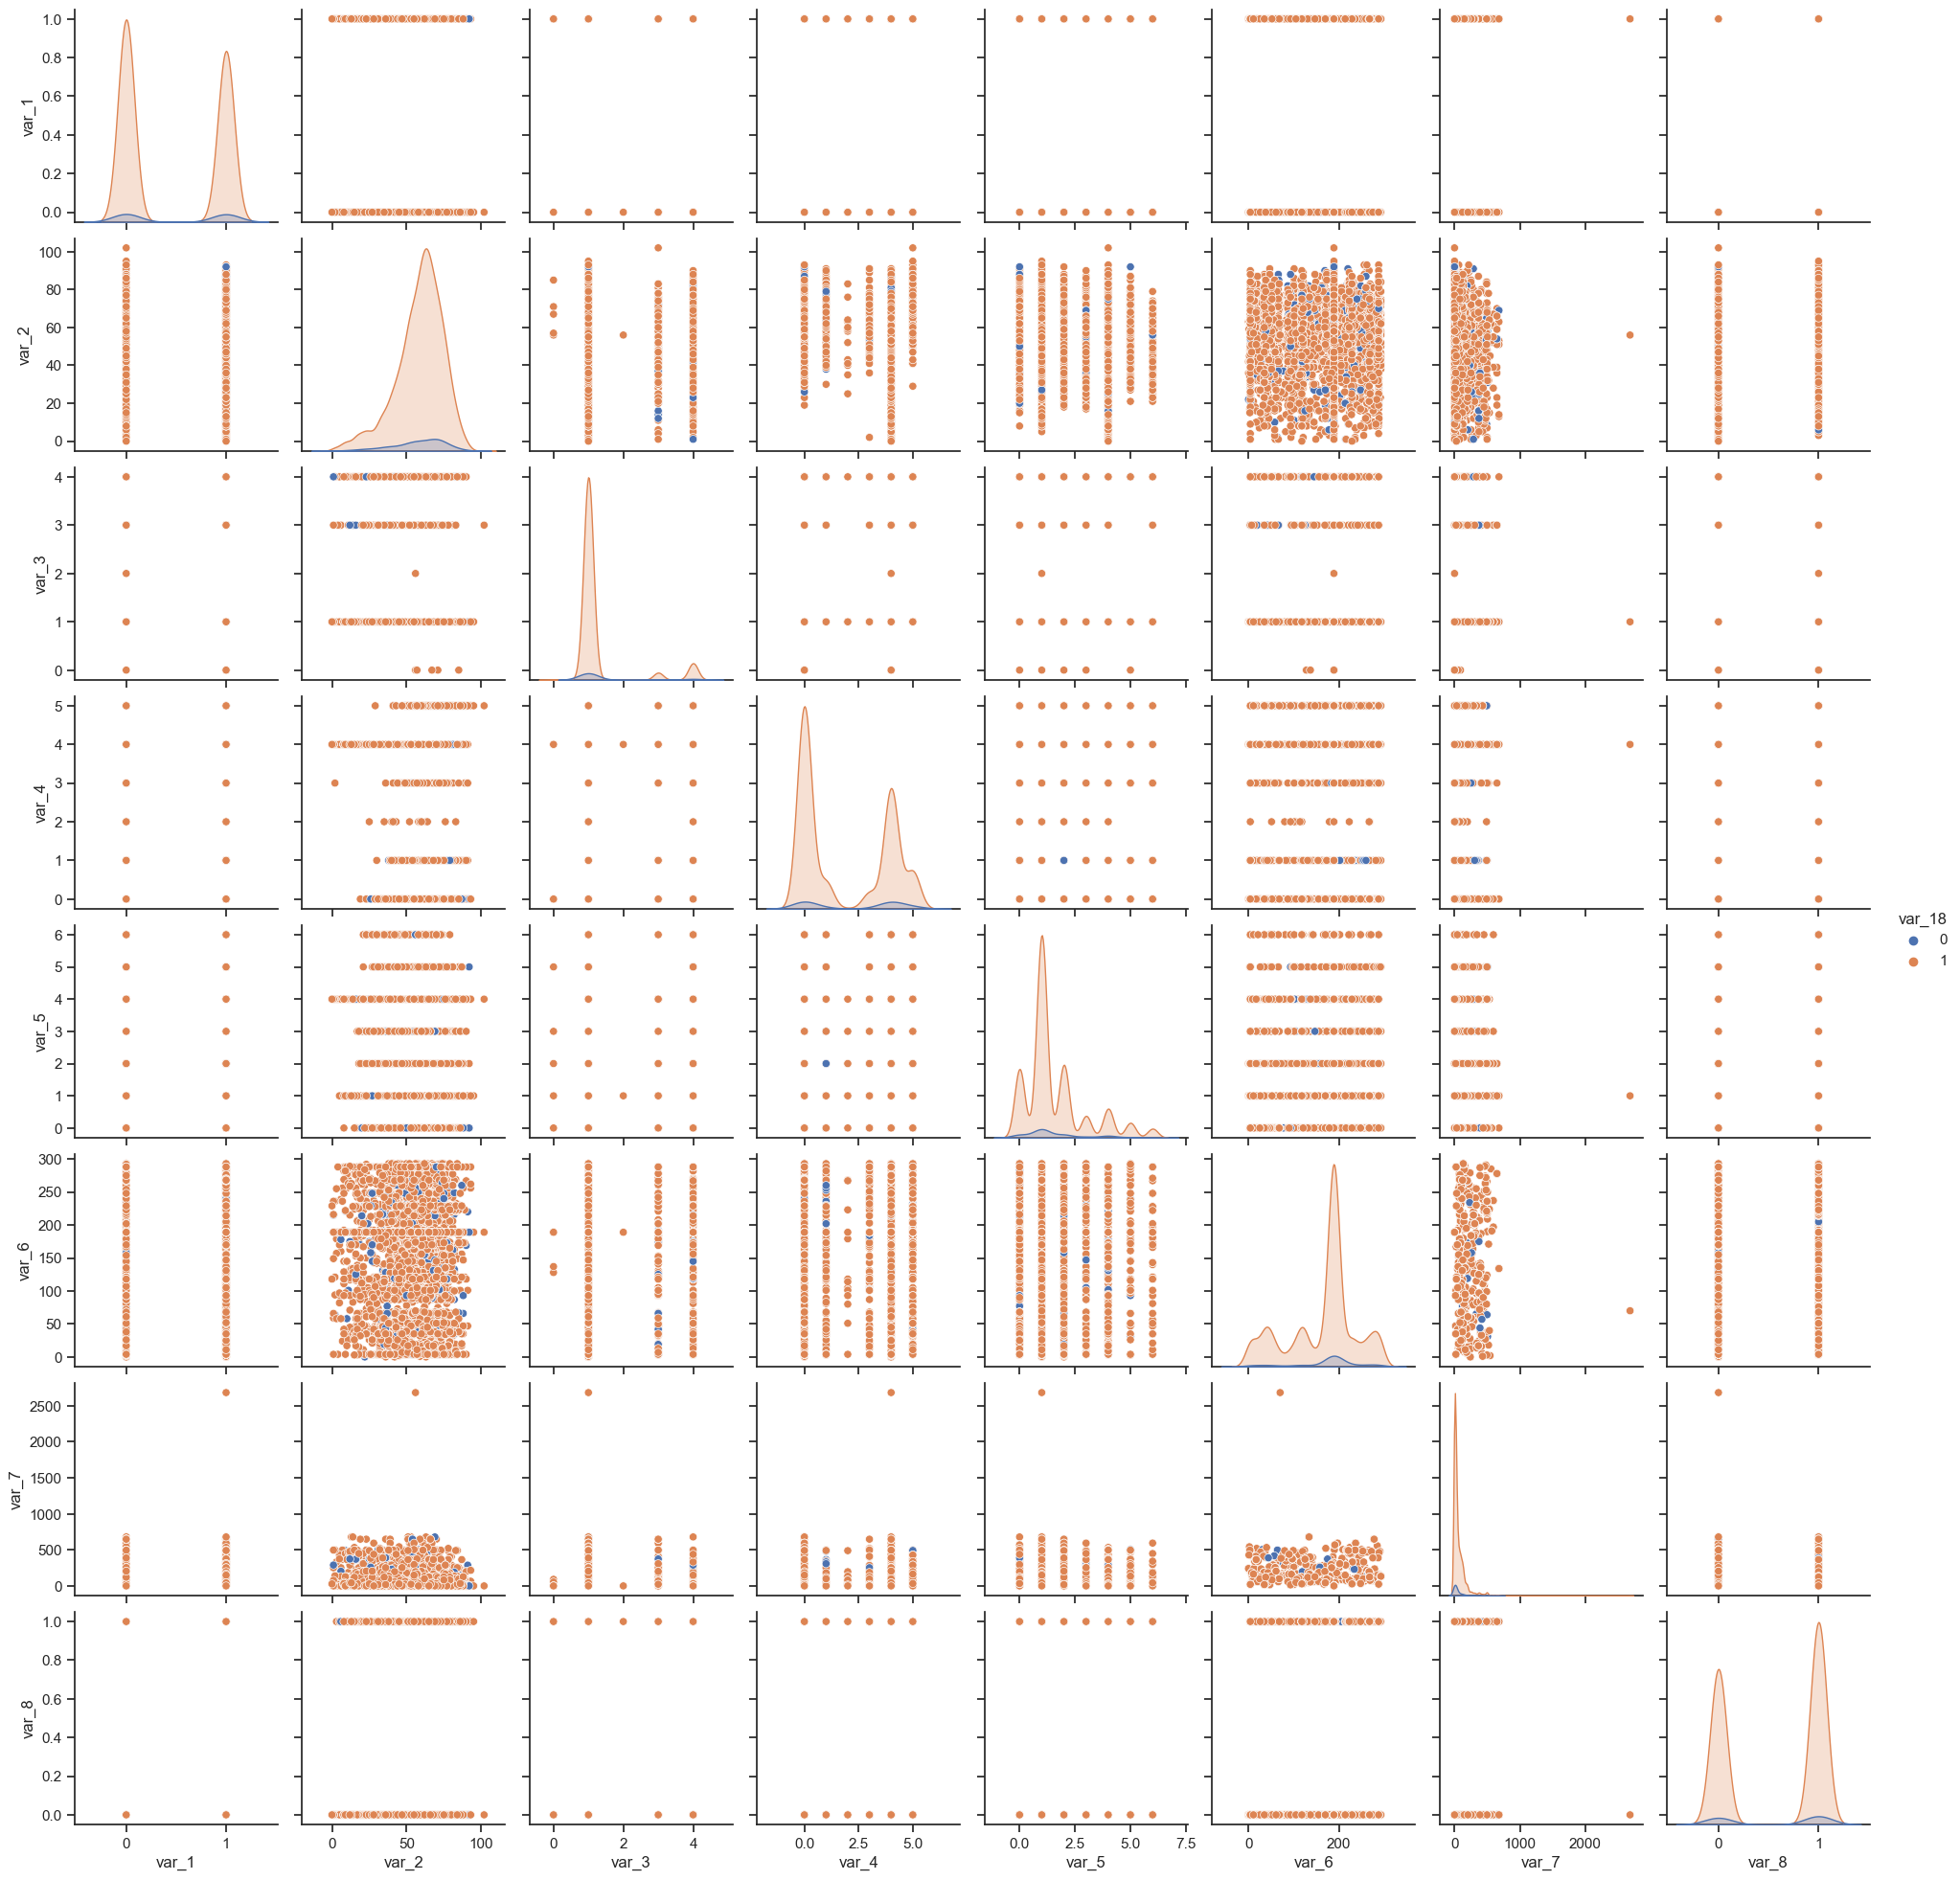

In [150]:
sns.set(style = 'ticks', color_codes=True)
sns.pairplot(data=data, vars = ["var_1","var_2","var_3","var_4","var_5","var_6","var_7","var_8"], hue="var_18")

<AxesSubplot: xlabel='var_18', ylabel='count'>

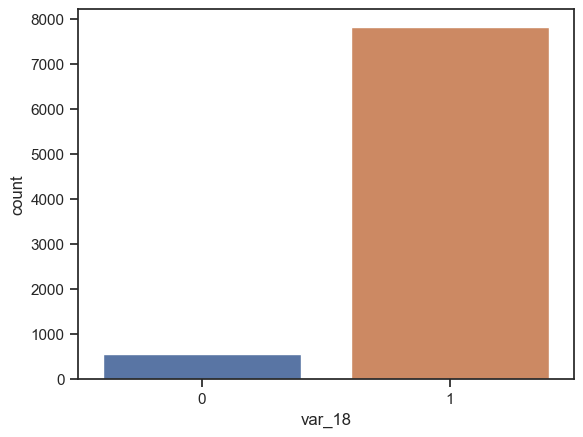

In [151]:
sns.countplot(data=data, x='var_18')

In [152]:
import matplotlib.pyplot as plt

<AxesSubplot: >

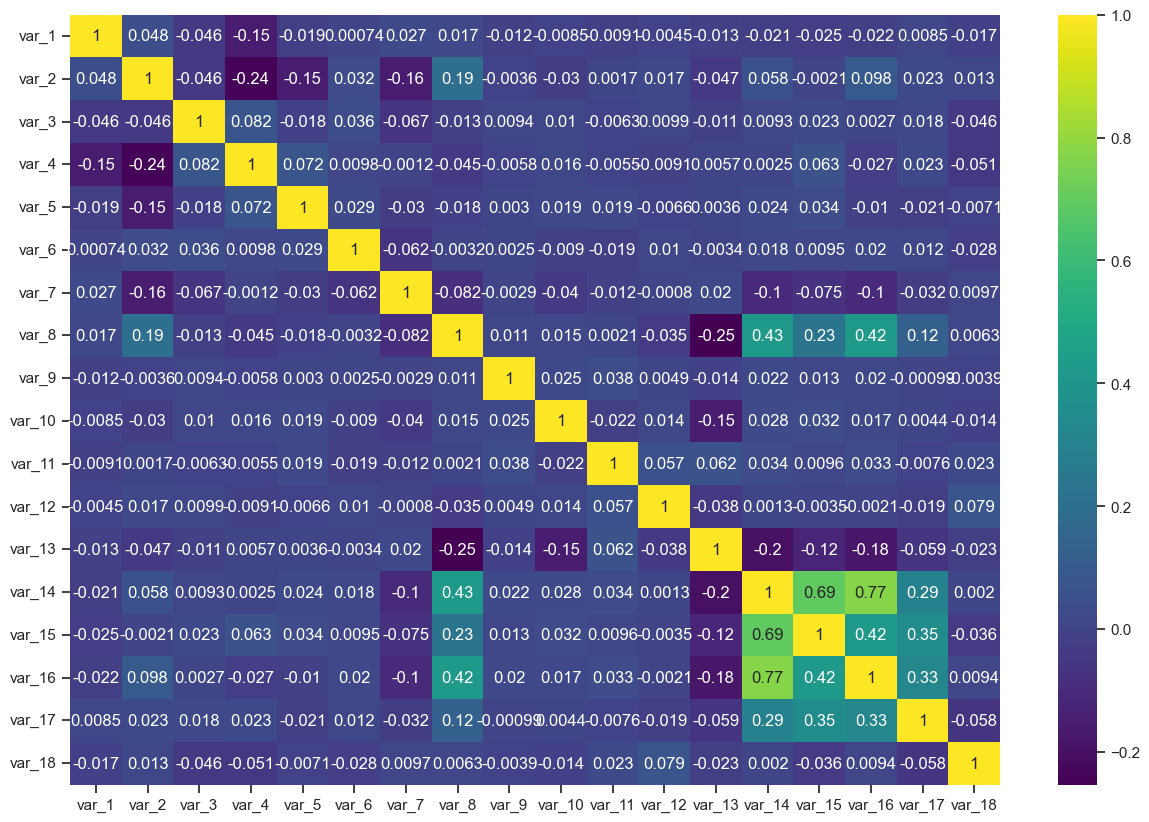

In [153]:
plt.figure(figsize=(15,10))
sns.heatmap(data= data.corr(), annot=True, cmap='viridis')

<AxesSubplot: xlabel='var_8', ylabel='Density'>

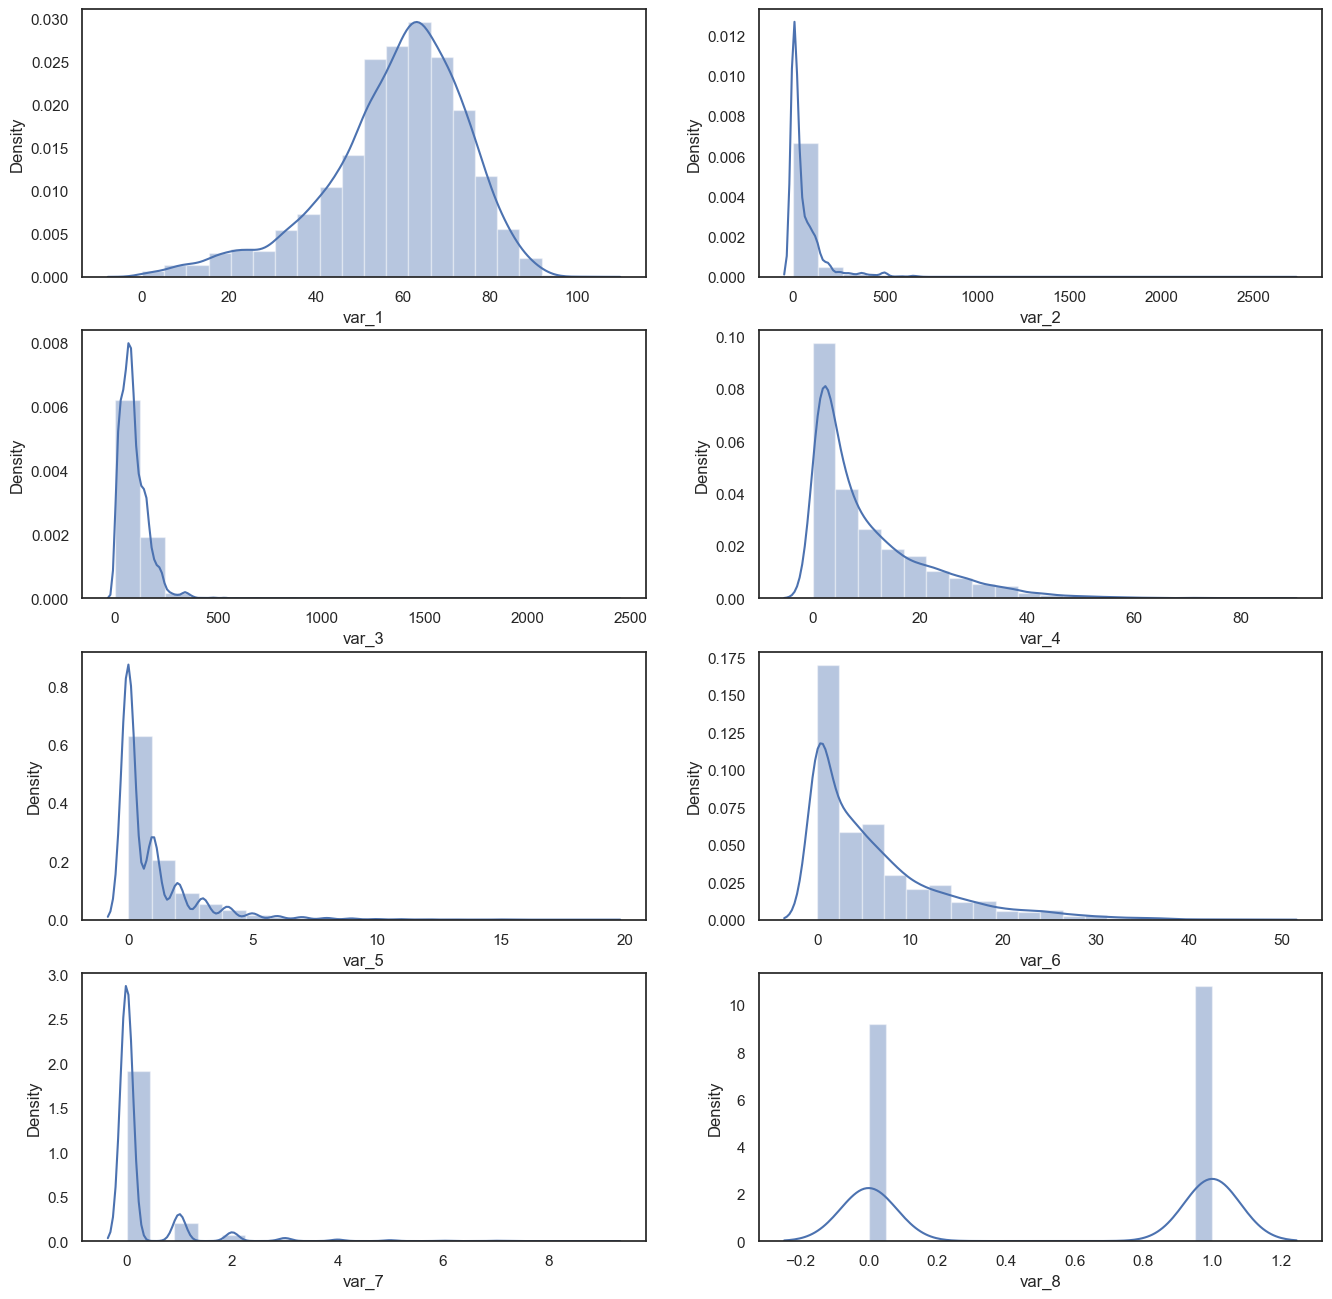

In [112]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(data.var_1, bins = 20, ax=ax[0,0]) 
sns.distplot(data.var_2, bins = 20, ax=ax[0,1]) 
sns.distplot(data.var_3, bins = 20, ax=ax[1,0]) 
sns.distplot(data.var_4, bins = 20, ax=ax[1,1]) 
sns.distplot(data.var_5, bins = 20, ax=ax[2,0])
sns.distplot(data.var_6, bins = 20, ax=ax[2,1])
sns.distplot(data.var_7, bins = 20, ax=ax[3,0]) 
sns.distplot(data.var_8, bins = 20, ax=ax[3,1]) 

<AxesSubplot: title={'center': 'Correlation with Target'}>

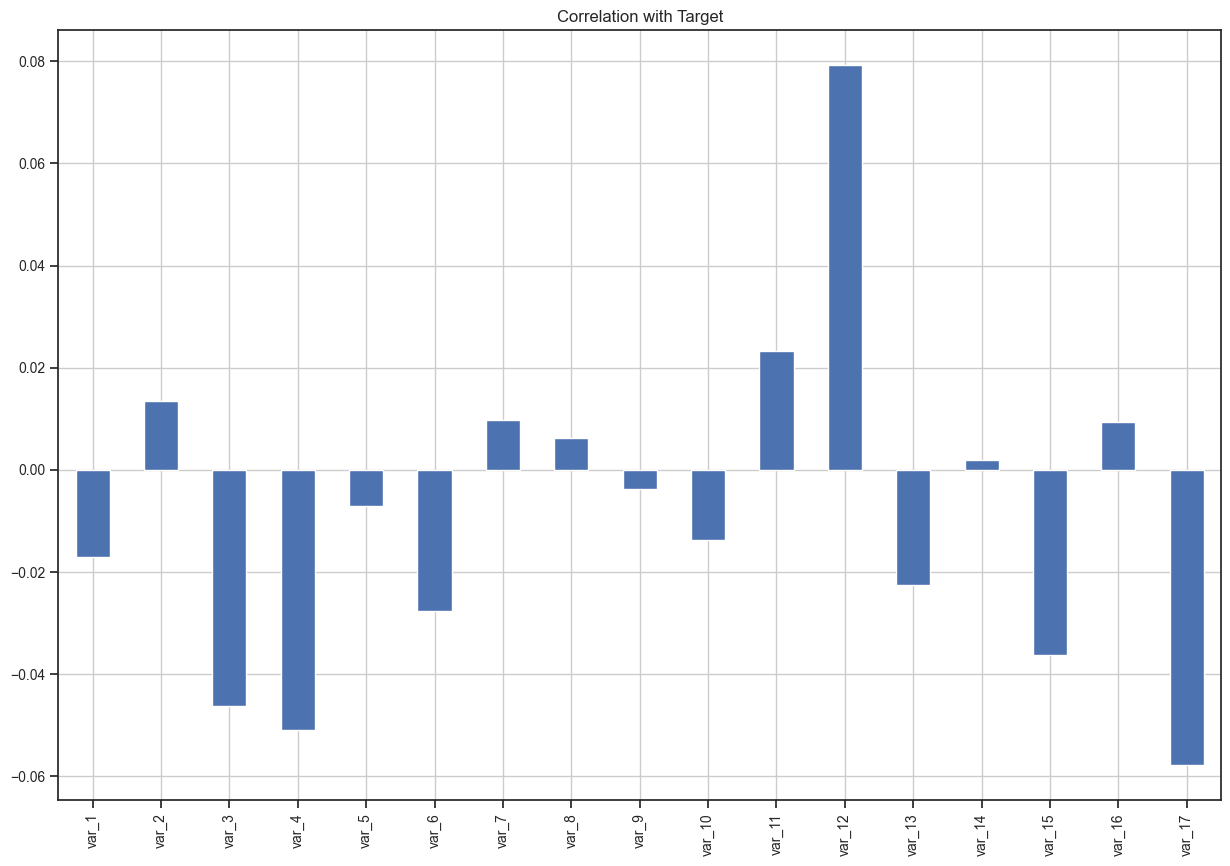

In [156]:
X.corrwith(data.var_18).plot.bar(figsize = (15, 10), title = "Correlation with Target", fontsize = 10,grid = True)

<AxesSubplot: xlabel='var_1', ylabel='var_18'>

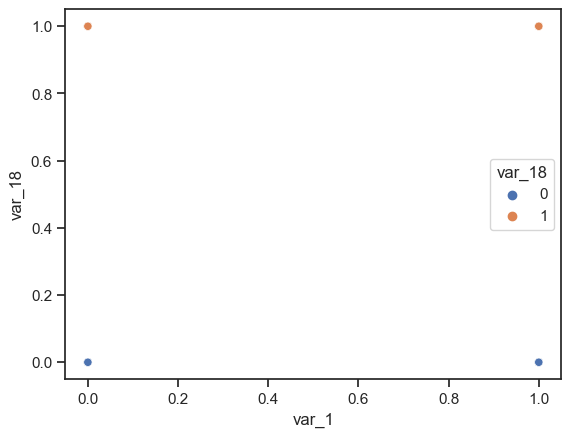

In [173]:
sns.scatterplot(x=data.var_1,y=data.var_18,hue=data.var_18)

<AxesSubplot: >

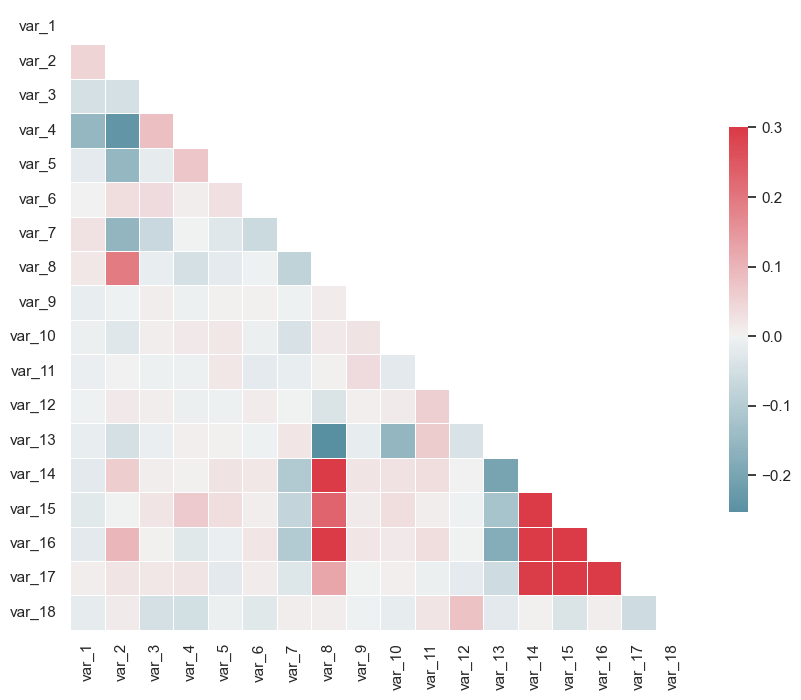

In [174]:
## Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=0)

In [119]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [121]:
y_train

4589    1.0
6121    1.0
2576    1.0
1849    1.0
5255    1.0
       ... 
7414    1.0
7321    1.0
6843    1.0
2975    1.0
2876    1.0
Name: var_349, Length: 6705, dtype: float64

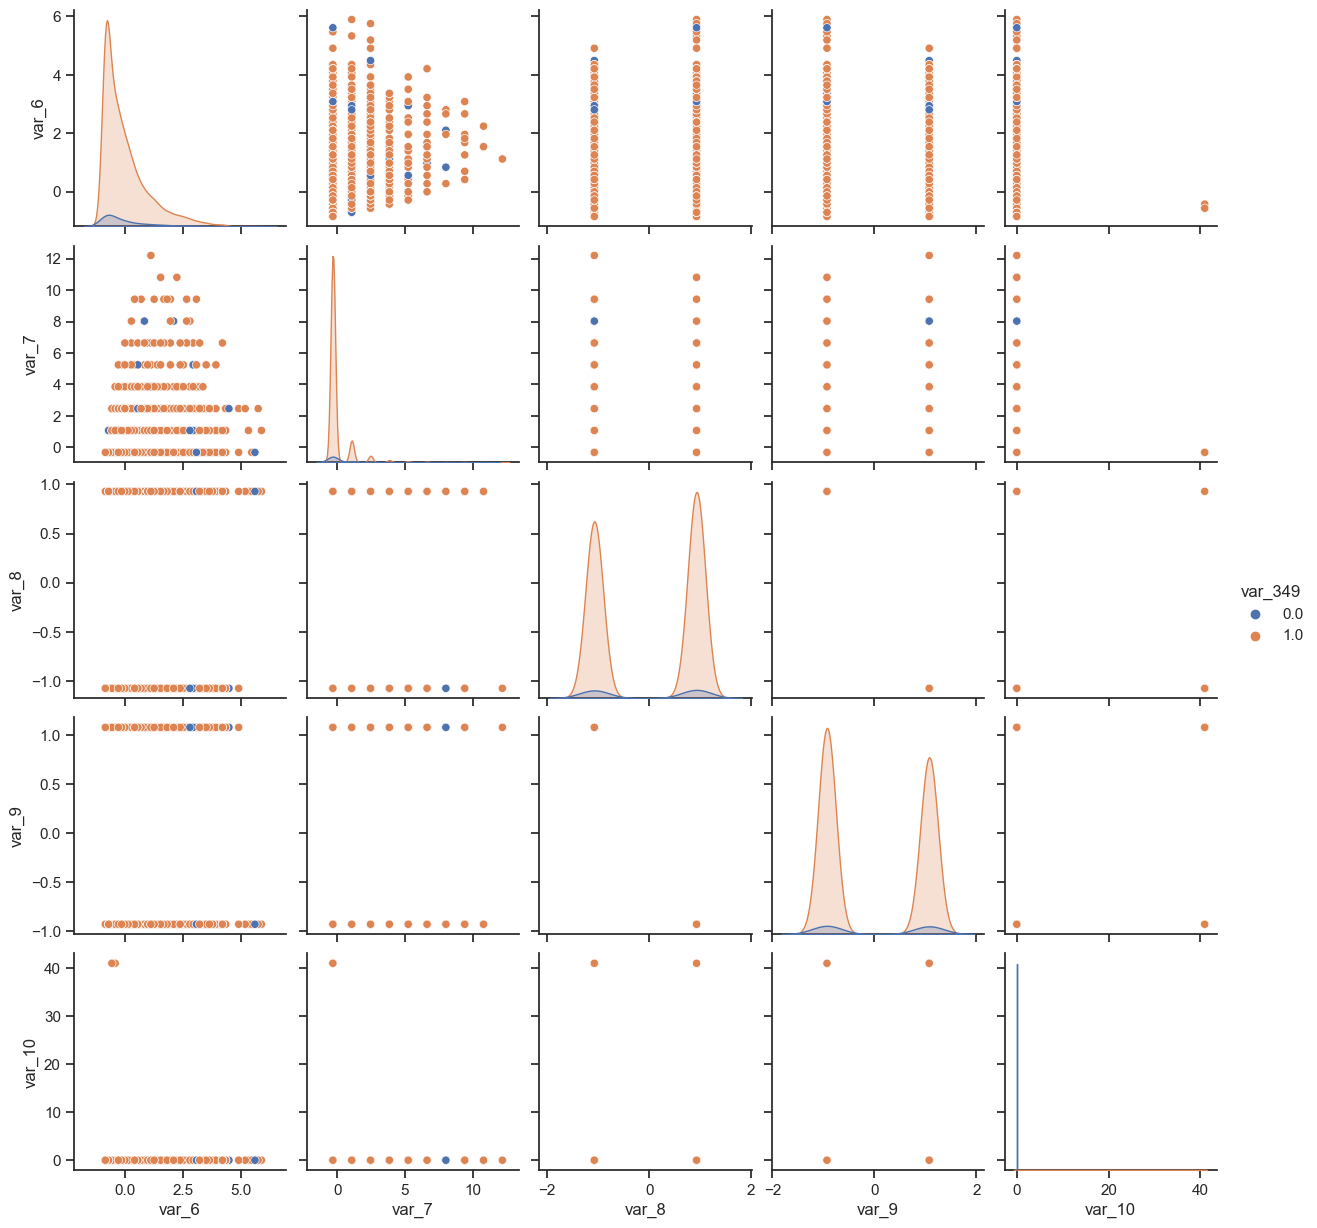

In [137]:
XV = pd.concat([X_train,y_train],axis=1)
sns.pairplot(data=XV,vars=["var_6","var_7","var_8","var_9","var_10"],hue="var_349")

In [102]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, penalty='l2')
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [103]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score, confusion_matrix
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)
results = pd.DataFrame([['Logistic Regression (Lasso)', acc,prec,rec,f1]],columns=['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.93381,0.93381,1.0,0.965772


Test Data Accuracy: 0.9338


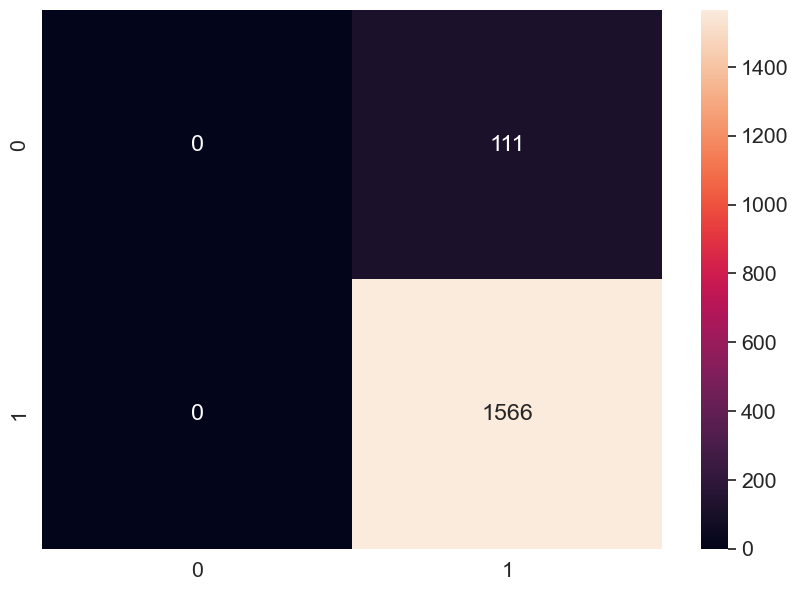

In [104]:
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred)) 

In [105]:
y_pred_prob = classifier.predict_proba(X_test)
from scipy import integrate
def capcurve(y_values, y_preds_proba):
    num_pos_obs = np.sum(y_values)
    num_count = len(y_values)
    rate_pos_obs = float(num_pos_obs) / float(num_count)
    ideal = pd.DataFrame({'x':[0,rate_pos_obs,1],'y':[0,1,1]})
    xx = np.arange(num_count) / float(num_count - 1)
    
    y_cap = np.c_[y_values,y_preds_proba]
    y_cap_df_s = pd.DataFrame(data=y_cap)
    y_cap_df_s = y_cap_df_s.sort_values([1], ascending=False).reset_index(level = y_cap_df_s.index.names, drop=True)
    
    print(y_cap_df_s.head(20))
    
    yy = np.cumsum(y_cap_df_s[0]) / float(num_pos_obs)
    yy = np.append([0], yy[0:num_count-1]) #add the first curve point (0,0) : for xx=0 we have yy=0
    
    percent = 0.5
    row_index = int(np.trunc(num_count * percent))
    
    val_y1 = yy[row_index]
    val_y2 = yy[row_index+1]
    if val_y1 == val_y2:
        val = val_y1*1.0
    else:
        val_x1 = xx[row_index]
        val_x2 = xx[row_index+1]
        val = val_y1 + ((val_x2 - percent)/(val_x2 - val_x1))*(val_y2 - val_y1)
    
    sigma_ideal = 1 * xx[num_pos_obs - 1 ] / 2 + (xx[num_count - 1] - xx[num_pos_obs]) * 1
    sigma_model = integrate.simps(yy,xx)
    sigma_random = integrate.simps(xx,xx)
    
    ar_value = (sigma_model - sigma_random) / (sigma_ideal - sigma_random)
    
    fig, ax = plt.subplots(nrows = 1, ncols = 1)
    ax.plot(ideal['x'],ideal['y'], color='grey', label='Perfect Model')
    ax.plot(xx,yy, color='red', label='User Model')
    ax.plot(xx,xx, color='blue', label='Random Model')
    ax.plot([percent, percent], [0.0, val], color='green', linestyle='--', linewidth=1)
    ax.plot([0, percent], [val, val], color='green', linestyle='--', linewidth=1, label=str(val*100)+'% of positive obs at '+str(percent*100)+'%')
    
    plt.xlim(0, 1.02)
    plt.ylim(0, 1.25)
    plt.title("CAP Curve - a_r value ="+str(ar_value))
    plt.xlabel('% of the data')
    plt.ylabel('% of positive obs')
    plt.legend()

In [106]:
capcurve(y_test,y_pred_prob[:,1])

      0         1
0   1.0  1.000000
1   1.0  0.999992
2   1.0  0.999992
3   1.0  0.999989
4   1.0  0.999989
5   1.0  0.999987
6   1.0  0.999986
7   1.0  0.999985
8   1.0  0.999985
9   1.0  0.999984
10  1.0  0.999983
11  1.0  0.999982
12  1.0  0.999979
13  1.0  0.999977
14  1.0  0.999976
15  1.0  0.999975
16  1.0  0.999972
17  1.0  0.999967
18  1.0  0.999964
19  1.0  0.999959


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator= classifier, X=X_train, y=y_train, cv=10)
accuracies.mean()
accuracies.std()
print('Logistic Regression (Lasso) Accuracy: %0.3f (+/- %0.3f)' % (accuracies.mean(), accuracies.std() * 2))

In [107]:
pd.concat([pd.DataFrame(X_train.columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,var_1,-0.018604
1,var_2,0.324011
2,var_3,-0.107470
3,var_4,0.130618
4,var_5,-0.150652
...,...,...
342,var_343,-0.221785
343,var_344,-0.028830
344,var_345,0.038599
345,var_346,0.046075


In [108]:
#Feature selection 
#Recursive feature elimination
from sklearn.feature_selection import RFE

#Select best feature 
rfe = RFE(classifier, n_features_to_select= None)
rfe = rfe.fit(X_train, y_train)

#Summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
X_train.columns[rfe.support_]

[False False  True  True  True False  True False  True  True  True  True
 False False False False  True False  True  True False False False False
  True False  True False False  True  True False False  True  True  True
  True  True False False  True False  True False False False False  True
 False False False False  True  True  True False  True False  True False
  True  True False  True  True False  True False  True  True  True False
  True  True False  True False  True  True  True  True  True False False
  True False  True False False False False  True  True False False  True
 False False False False  True  True False  True False False  True False
  True False  True  True False  True False False False  True  True  True
 False  True  True False  True  True False False False  True  True  True
 False  True  True  True  True False  True  True  True  True  True  True
  True False  True False False  True False  True False False  True False
  True False False  True False False False False  T

Index(['var_3', 'var_4', 'var_5', 'var_7', 'var_9', 'var_10', 'var_11',
       'var_12', 'var_17', 'var_19',
       ...
       'var_335', 'var_336', 'var_337', 'var_338', 'var_339', 'var_340',
       'var_341', 'var_342', 'var_343', 'var_346'],
      dtype='object', length=173)

<AxesSubplot: >

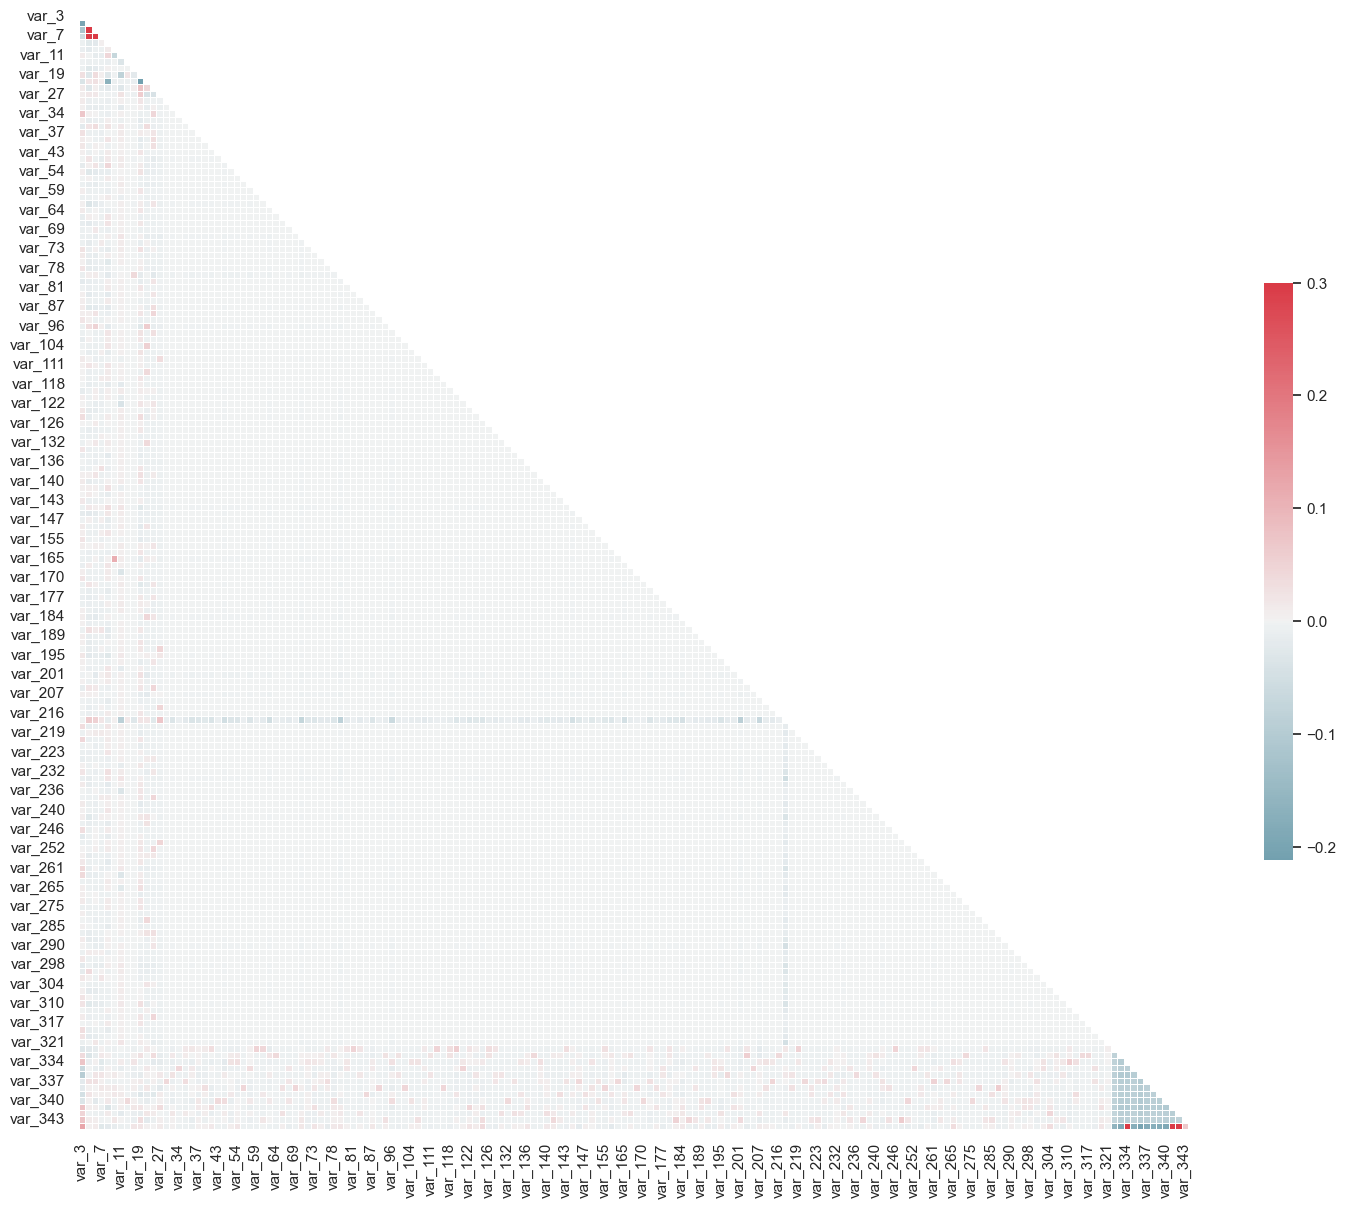

In [109]:
# New Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = X_train[X_train.columns[rfe.support_]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}) 

In [110]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, penalty= 'l2')
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test[X_train.columns[rfe.support_]])
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Logistic Regression RFE (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.93381,0.93381,1.0,0.965772
1,Logistic Regression RFE (Lasso),0.93381,0.93381,1.0,0.965772


In [111]:
y_pred_prob = classifier.predict_proba(X_test[X_train.columns[rfe.support_]])
capcurve(y_test,y_pred_prob[:,1])

      0         1
0   1.0  1.000000
1   1.0  0.999990
2   1.0  0.999989
3   1.0  0.999987
4   1.0  0.999984
5   1.0  0.999984
6   1.0  0.999984
7   1.0  0.999982
8   1.0  0.999980
9   1.0  0.999980
10  1.0  0.999979
11  1.0  0.999979
12  1.0  0.999978
13  1.0  0.999973
14  1.0  0.999973
15  1.0  0.999968
16  1.0  0.999963
17  1.0  0.999962
18  1.0  0.999945
19  1.0  0.999941


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices